![![University of Information Technology and Management in Rzeszow, Poland](https://gitlab.wsiz.pl/lgajecki/SA/-/raw/master/wsiz_eng.png)](wsiz_eng.png)

# Laboratory 7 - Model selection. Hyperparameter tuning

Sprawozdanie $\ \ \ \ \ \ \ \ $   Imie: ......Jakub..............  Nazwisko: .......Jop.....  | Nr albumu : ..........w67238........ | Lab1 | Lab2 | Lab3 | Lab4 |Lab5 | Lab5_2+6 | Lab 6_2+7| Razem (max 50 pkt)
:--|:--|--|--|--|--|--|--|--|--
Efekt PU01 'Ocena rozwiązań problemów przygotowywanych w ramach poszczególnych laboratoriów' | - ocena za wykonanie ćwiczeń i ich interpretację. | 

[1] https://scikit-learn.org/stable/modules/cross_validation.html

[2] https://scikit-learn.org/stable/modules/grid_search.html

[3] https://scikit-learn.org/stable/modules/model_evaluation.html

[4] https://medium.com/@aleksej.gudkov/ml-model-selection-in-python-examples-and-best-practices-c7cc30b231dc

### 7.1 Model selection

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.datasets import load_iris
# Load dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 1.00
Support Vector Machine: Accuracy = 1.00
Random Forest: Accuracy = 0.98


In [12]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Average Accuracy = {np.mean(scores):.2f} Folds:{scores}")

Logistic Regression: Average Accuracy = 0.97 Folds:[0.96666667 1.         0.93333333 0.96666667 1.        ]
Support Vector Machine: Average Accuracy = 0.97 Folds:[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: Average Accuracy = 0.97 Folds:[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


### 7.2 Hyperparameter tuning

In [13]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)
# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validated Accuracy: 0.9333333333333333


### 7.3. Evaluation Metrics
- for classifcation (Accuracy, R2,ROC...)
- for regression (MSE, MAE,...)



In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

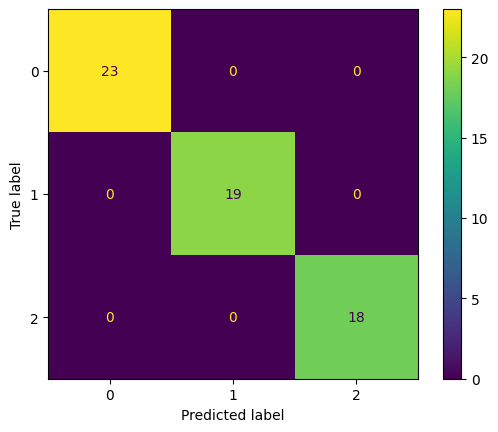

In [15]:
_ = ConfusionMatrixDisplay.from_estimator(models["Logistic Regression"], X_test, y_test)

**Mandatory exercises** (70% points): 
1. Run the code
2. Apply any other model for given dataset
3. Add any of parameter to gridsearch

**Exercies** (2 required for 100% points)

1. Use other dataset (any from past classes), apply at least 3 models for it
2. Perform hyperparameter tuning for one of models (such, that they have hyperparameter)
3. Calculate at least 2 metrics for used models

In [16]:
#Apply any other model for given dataset
from sklearn.ensemble import GradientBoostingClassifier


models["Gradient Boosting"] = GradientBoostingClassifier()


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


scores = cross_val_score(models["Gradient Boosting"], X, y, cv=5)
print(f"Gradient Boosting: Average Accuracy = {np.mean(scores):.2f} Folds:{scores}")


Logistic Regression: Accuracy = 1.00
Support Vector Machine: Accuracy = 1.00
Random Forest: Accuracy = 0.98
Gradient Boosting: Accuracy = 0.98
Gradient Boosting: Average Accuracy = 0.96 Folds:[0.96666667 0.96666667 0.9        0.96666667 1.        ]


In [17]:
#Add any of parameter to gridsearch


param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']  
}


param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7]
}


grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy'
)
grid_search_rf.fit(X_train, y_train)


grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy'
)
grid_search_gb.fit(X_train, y_train)


print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy for RF:", grid_search_rf.best_score_)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validated Accuracy for GB:", grid_search_gb.best_score_)


Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validated Accuracy for RF: 0.9333333333333333
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
Best Cross-Validated Accuracy for GB: 0.9222222222222223


In [18]:
#Exercise 1 -Use other dataset (any from past classes), apply at least 3 models for it

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


data = load_iris()
X = data.data  
y = data.target  


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Average Accuracy = {np.mean(scores):.2f} Folds:{scores}")


Logistic Regression: Accuracy = 0.98
Support Vector Machine: Accuracy = 0.98
Random Forest: Accuracy = 0.98
Logistic Regression: Average Accuracy = 0.96 Folds:[0.96666667 1.         0.93333333 0.9        1.        ]
Support Vector Machine: Average Accuracy = 0.97 Folds:[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Random Forest: Average Accuracy = 0.96 Folds:[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [19]:
#Exercise 2 -Perform hyperparameter tuning for one of models (such, that they have hyperparameter)

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']  
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.9333333333333333


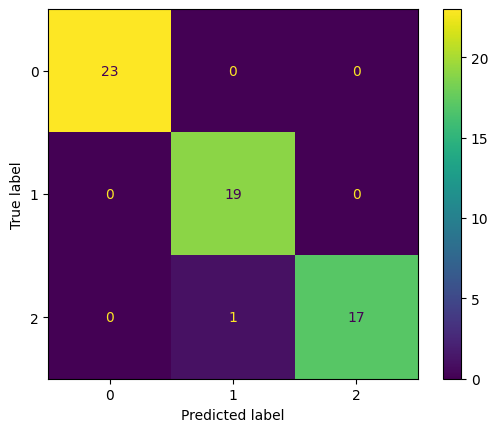


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2

In [22]:
#Exercise 3 - Calculate at least 2 metrics for used models

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Confusion matrix dla regresji logistycznej
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models["Logistic Regression"], X_test, y_test)
plt.show()

# Raport klasyfikacji dla wszystkich modeli
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

# Obliczenie ROC-AUC dla regresji logistycznej (potrzebne `predict_proba`)
y_prob = models["Logistic Regression"].predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
print("\nLogistic Regression - ROC-AUC Score:", roc_auc)
